<a href="https://colab.research.google.com/github/Laban254/data-science-and-ml-exercises/blob/main/keras/Basic_Keras_MNIST_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


Load and Preprocess the MNIST Dataset:

In [3]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten the 28x28 images into 1D vectors of size 784
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))


Build the Model:

In [5]:
# Build a simple Sequential model
model = Sequential([
    Dense(128, activation='relu', input_shape=(28 * 28,)),  # First hidden layer with 128 neurons
    Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each digit)
])

# Display model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Compile the Model:

In [6]:
# Compile the model with Adam optimizer and categorical cross-entropy loss
model.compile(optimizer='adam',  # Try changing this to 'sgd' or 'rmsprop'
              loss='sparse_categorical_crossentropy',  # You can also try 'mean_squared_error' for regression tasks
              metrics=['accuracy'])


Train the Model:

In [7]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8810 - loss: 0.4312 - val_accuracy: 0.9629 - val_loss: 0.1264
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9661 - loss: 0.1150 - val_accuracy: 0.9649 - val_loss: 0.1140
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9782 - loss: 0.0744 - val_accuracy: 0.9748 - val_loss: 0.0821
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9834 - loss: 0.0553 - val_accuracy: 0.9746 - val_loss: 0.0796
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9876 - loss: 0.0402 - val_accuracy: 0.9762 - val_loss: 0.0831


Evaluate the Model:

In [8]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9723 - loss: 0.0958
Test accuracy: 0.9761999845504761


Make Predictions:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


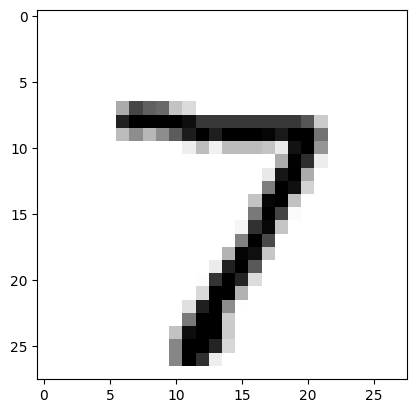

Predicted label: 7


In [9]:
# Predict on the first image in the test dataset
predictions = model.predict(test_images)

# Display the first test image and its predicted label
plt.imshow(test_images[0].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

# Print the predicted class
predicted_label = predictions[0].argmax()  # Get the index of the highest predicted probability
print(f'Predicted label: {predicted_label}')


Experiment with Different Hyperparameters:
Change the number of layers:

In [10]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(28 * 28,)),
    Dense(64, activation='relu'),  # Add another hidden layer
    Dense(10, activation='softmax')
])


Adjust the learning rate:

In [11]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)  # Try different values for learning rate
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Change batch size:

In [12]:
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))  # Try different batch sizes


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8603 - loss: 0.5021 - val_accuracy: 0.9549 - val_loss: 0.1487
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9623 - loss: 0.1239 - val_accuracy: 0.9708 - val_loss: 0.0992
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9751 - loss: 0.0817 - val_accuracy: 0.9682 - val_loss: 0.0969
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9832 - loss: 0.0549 - val_accuracy: 0.9743 - val_loss: 0.0821
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9860 - loss: 0.0447 - val_accuracy: 0.9778 - val_loss: 0.0727


Use different optimizers:

SGD

In [13]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


RMSprop

In [14]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Visualize Training Metrics

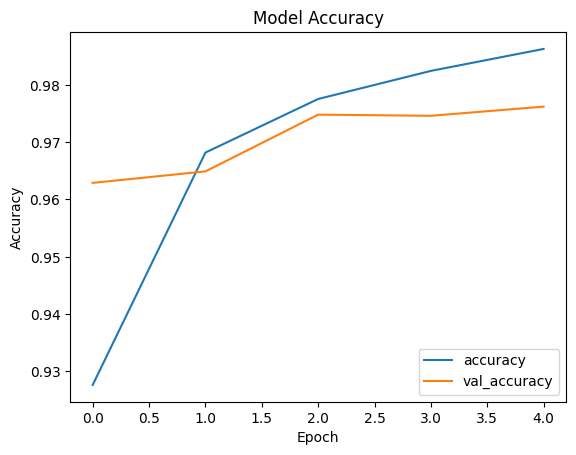

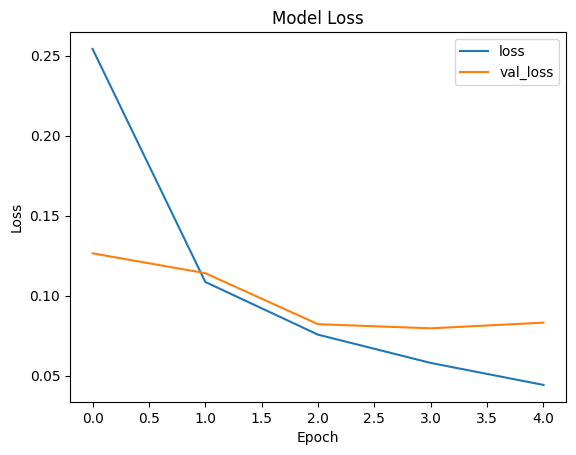

In [15]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.show()


Try different numbers of layers and neurons: Adding more layers and neurons can sometimes help the model perform better, but be mindful of overfitting.

Experiment with batch sizes: Try different batch sizes (e.g., 16, 64, 128) and observe how they affect training time and performance.

Try different activation functions: You can experiment with activation functions like tanh, sigmoid, or elu instead of relu.

Adjust the optimizer and learning rate: The optimizer and learning rate can significantly impact the model’s performance.

